https://onyxdata.co.uk/data-dna-dataset-challenge/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk as cyb

In [2]:
data = pd.read_csv('Onyx Data - DataDNA Dataset Challenge - July 2021 - Spotify Tracks.csv')

In [3]:
data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


### Features description

- **duration_ms** - The duration of the track in milliseconds.


- **key** - The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.


- **mode** - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.


- **time_signature** - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).


- **acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 


- **danceability** - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.


- **energy** - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 


- **instrumentalness** - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


- **liveness** - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.


- **loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.


- **speechiness** - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.


- **valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


- **tempo** - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.


- **id** - The Spotify ID for the track.


- **type** - The object type: “audio_features”


- **popularity** - The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.

# Can we identify what makes a hit track?

### EDA

In [4]:
#Only considering the year of the track release
data['release_date'] = data['release_date'].apply(lambda x: int(x.split('-')[0]))

In [5]:
data.describe()

,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,1988.566168,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,22.831283,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,1900.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,1974.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,1992.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,2007.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,2021.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


I noticed that year 1900 is an outlier because it only contains one track then the next year is 1922 and we have data for each year from there. Therefore I will remove year 1900 from my analysis.

In [6]:
data = data[data['release_date']!=1900]

<AxesSubplot:>

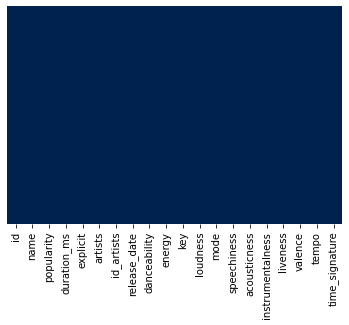

In [7]:
#Checking for null values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='cividis')

There are no null values in this dataset. Still, from the description of the variables, I know that when a key is equal to -1, no key was detected. Let's look for tracks with no detected key.

In [8]:
data[data['key']==-1]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


It looks like there were no tracks with no detected key. Then the dataset looks clean.

#### Popularity by date

In [9]:
popularity_by_date = data[['release_date','popularity']].groupby('release_date').mean()

<AxesSubplot:xlabel='release_date', ylabel='popularity'>

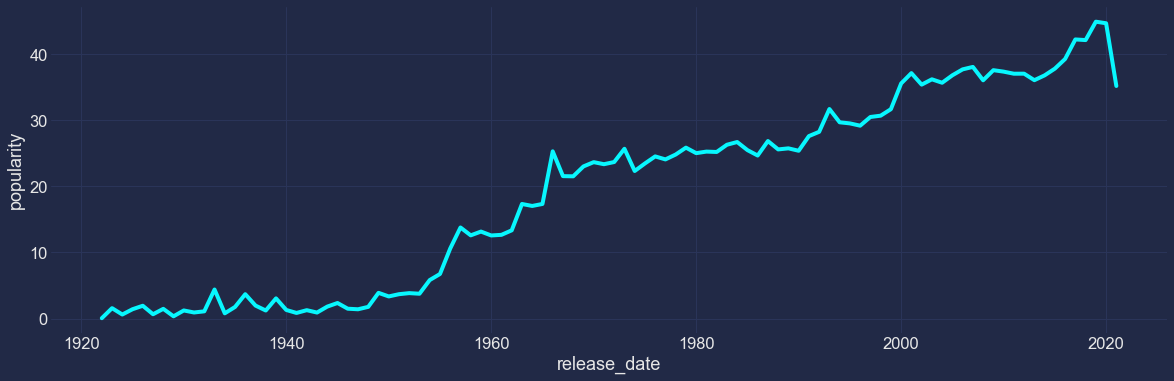

In [10]:
sns.set(rc={'figure.figsize':(20, 6),'legend.fontsize':50}, font_scale = 1.5)
plt.style.use('cyberpunk')
cyb.make_lines_glow()
sns.lineplot(x=popularity_by_date.index, y=popularity_by_date['popularity'], linewidth=4)

On this graph, we clearly see that popularity increased over time with a peak in 2020. However, we need to balance this with the fact that popularity is highly influenced by the time when the track was played. Most recent tracks will tend to have a higher popularity than older tracks.

Then we cannot solely rely on release date to determine if a song will be a hit or not. Still, I believe that each time period has its specificities and that factors for a song to be a hit differ from a year to another (or at least from a decade to another).

Therefore, I would like to check which factors influence the popularity of a song from a time period to another.

#### Correlation matrix

In [11]:
data.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

<AxesSubplot:>

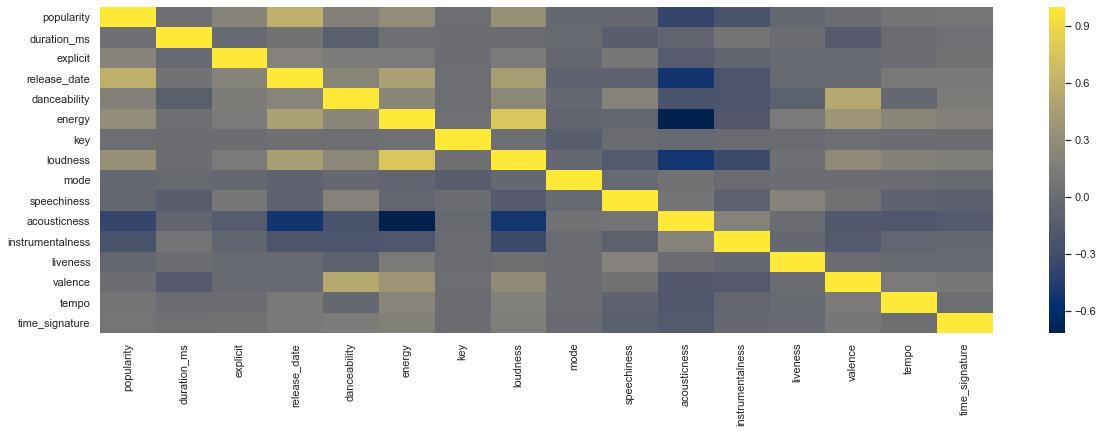

In [12]:
sns.set(rc={'figure.figsize':(20, 6),'legend.fontsize':50}, font_scale = 1)
sns.heatmap(data.drop(['id','name','artists','id_artists'],axis=1).corr(),cmap='cividis')

There are several key takeouts on this graph:
- Popularity is positively correlated with release_date, energy and loudness
- Popularity is negatively correlated with acousticness and instrumentalness

It looks like intensity, activity and loudness of a track has a positive impact on the popularity of a track.
While tracks with vocals and acoustic tracks seem to reduce the popularity.

Let's dive deeper into that and have a look at each song characteristic in line graphs.

#### Song characteristics

In [13]:
data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [14]:
song_char = data.drop(['id','name','popularity','duration_ms','explicit','artists','id_artists','key','mode','time_signature'],axis=1).groupby('release_date').mean()

In [15]:
song_char.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
release_date,,,,,,,,,
1922,0.533320,0.324054,-13.953241,0.246295,0.898857,0.324971,0.250670,0.563605,109.120405
1923,0.637332,0.266977,-16.351921,0.552072,0.859965,0.157659,0.225396,0.671967,109.552648
1924,0.593344,0.356725,-13.290367,0.375208,0.866266,0.339628,0.203447,0.554935,119.457894
1925,0.617391,0.263749,-14.977595,0.305693,0.912170,0.275384,0.255157,0.635196,113.901050
1926,0.622113,0.263075,-15.929906,0.356952,0.785739,0.323416,0.211447,0.539702,113.386792


Text(0, 0.5, 'Track characteristics')

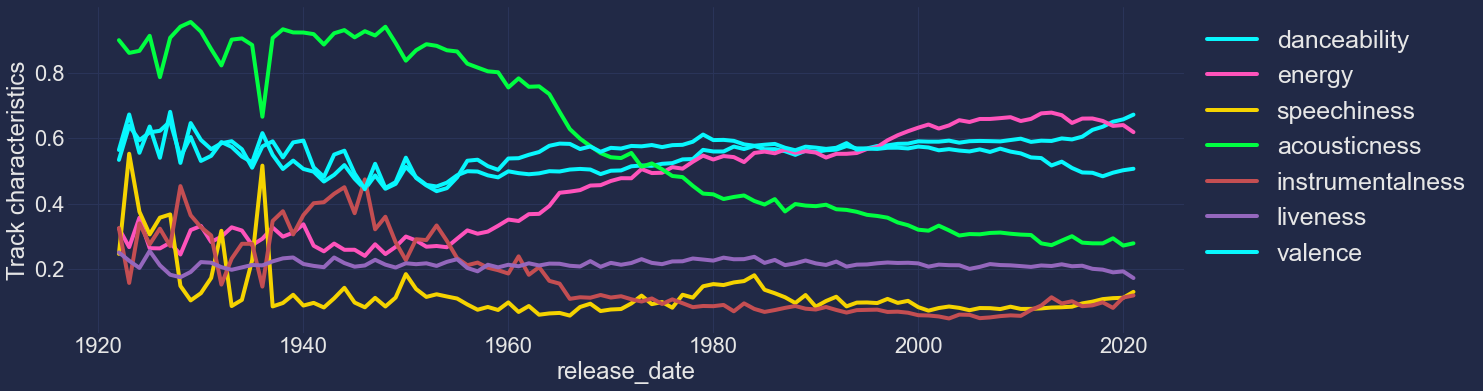

In [16]:
sns.set(rc={'figure.figsize':(20, 6),'legend.fontsize':50}, font_scale = 2)
plt.style.use('cyberpunk')
cyb.make_lines_glow()
sns.lineplot(x=song_char.index, y=song_char['danceability'], linewidth=4)
sns.lineplot(x=song_char.index, y=song_char['energy'], linewidth=4)
sns.lineplot(x=song_char.index, y=song_char['speechiness'], linewidth=4)
sns.lineplot(x=song_char.index, y=song_char['acousticness'], linewidth=4)
sns.lineplot(x=song_char.index, y=song_char['instrumentalness'], linewidth=4)
sns.lineplot(x=song_char.index, y=song_char['liveness'], linewidth=4)
sns.lineplot(x=song_char.index, y=song_char['valence'], linewidth=4)

labels = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
plt.legend(labels, ncol=1, frameon=False, fontsize = 25, bbox_to_anchor=([1, 1, 0, 0]))
plt.ylabel('Track characteristics')

#### Most popular artists

In [18]:
data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [19]:
data['lead_artist'] = data['artists'].apply(lambda x: x.strip('[]').split(',')[0].strip("''"))

In [20]:
popular_artists = data.groupby('lead_artist') \
       .agg({'name':'size', 'popularity':'mean'}) \
       .reset_index().sort_values('popularity',ascending=False)

In [21]:
popular_artists[popular_artists['name']>99].head(10)

,lead_artist,name,popularity
16557,Drake,180,62.400000
58492,Taylor Swift,384,61.151042
4895,Ariana Grande,107,60.869159
31307,Kanye West,143,60.475524
4852,Arctic Monkeys,107,60.028037
50765,Rihanna,139,59.985612
6060,BTS,270,59.870370
17206,Ed Sheeran,120,58.658333
18423,Eminem,199,58.336683
34054,Lana Del Rey,151,57.993377


#### Most popular tracks

In [22]:
popular_tracks = data[['name','artists','release_date','popularity']].sort_values('popularity',ascending=False)

In [23]:
popular_tracks.head(10)

,name,artists,release_date,popularity
93802,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']",2021,100
93803,drivers license,['Olivia Rodrigo'],2021,99
93804,Astronaut In The Ocean,['Masked Wolf'],2021,98
92811,telepatía,['Kali Uchis'],2020,97
92810,Save Your Tears,['The Weeknd'],2020,97
92813,Blinding Lights,['The Weeknd'],2020,96
93805,Leave The Door Open,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",2021,96
92814,The Business,['Tiësto'],2020,95
92816,Heartbreak Anniversary,['Giveon'],2020,94
92819,Bandido,"['Myke Towers', 'Juhn']",2020,94


There we clearly see that popularity is influenced by how recent a track is.

I would like to see which tracks are most popular by year/decade.

In [24]:
popular_track_by_year = data[['name','artists','release_date','popularity']].loc[data[['name','artists','release_date','popularity']].groupby("release_date")["popularity"].idxmax()]

In [25]:
popular_track_by_year.tail()

,name,artists,release_date,popularity
89909,Believer,['Imagine Dragons'],2017,88
90900,lovely (with Khalid),"['Billie Eilish', 'Khalid']",2018,89
91866,Streets,['Doja Cat'],2019,94
92810,Save Your Tears,['The Weeknd'],2020,97
93802,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']",2021,100


In [26]:
def decade(x):
    decades = [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]
    for i in decades:
        if x in range(i,i+10):
            return "-".join([str(i),str(i+9)])

In [27]:
data['release_decade'] = data['release_date'].apply(lambda x: decade(x))

In [28]:
popular_track_by_decade = data[['name','artists','release_date','release_decade','popularity']].loc[data[['name','artists','release_date','release_decade','popularity']].groupby("release_decade")["popularity"].idxmax()]

In [29]:
popular_track_by_decade.tail(11)

,name,artists,release_date,release_decade,popularity
4857,Mack the Knife,['Louis Armstrong'],1929,1920-1929,55
8095,All of Me,['Billie Holiday'],1933,1930-1939,65
22549,Gymnopédie No. 1,"['Erik Satie', 'Philippe Entremont']",1949,1940-1949,69
32498,Johnny B. Goode,['Chuck Berry'],1959,1950-1959,77
42488,Here Comes The Sun - Remastered 2009,['The Beatles'],1969,1960-1969,83
50488,Dreams - 2004 Remaster,['Fleetwood Mac'],1977,1970-1979,86
58488,Take on Me,['a-ha'],1985,1980-1989,86
63438,Thunderstruck,['AC/DC'],1990,1990-1999,83
78355,Cupid's Chokehold / Breakfast in America,['Gym Class Heroes'],2005,2000-2009,87
91866,Streets,['Doja Cat'],2019,2010-2019,94


#### Title length vs. popularity

In [30]:
data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,lead_artist,release_decade
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922,0.645,0.4450,...,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,Uli,1920-1929
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922,0.695,0.2630,...,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,Fernando Pessoa,1920-1929
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.434,0.1770,...,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,Ignacio Corsini,1920-1929
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.321,0.0946,...,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,Ignacio Corsini,1920-1929
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,Dick Haymes,1920-1929


In [31]:
#I noticed that there were null values in the track titles
data['name'].dropna(inplace=True)

In [32]:
data['title_length'] = data['name'].apply(lambda x: len(x))

In [33]:
data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,lead_artist,release_decade,title_length
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922,0.645,0.4450,...,0.4510,0.674,0.7440,0.151,0.127,104.851,3,Uli,1920-1929,5.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922,0.695,0.2630,...,0.9570,0.797,0.0000,0.148,0.655,102.009,1,Fernando Pessoa,1920-1929,35.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.434,0.1770,...,0.0512,0.994,0.0218,0.212,0.457,130.418,5,Ignacio Corsini,1920-1929,34.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.321,0.0946,...,0.0504,0.995,0.9180,0.104,0.397,169.980,3,Ignacio Corsini,1920-1929,29.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0.0390,0.989,0.1300,0.311,0.196,103.220,4,Dick Haymes,1920-1929,19.0


In [34]:
length_per_popularity = data[['title_length','popularity']].groupby('title_length').mean()

In [35]:
length_per_popularity.reset_index(inplace=True)

<AxesSubplot:xlabel='title_length', ylabel='popularity'>

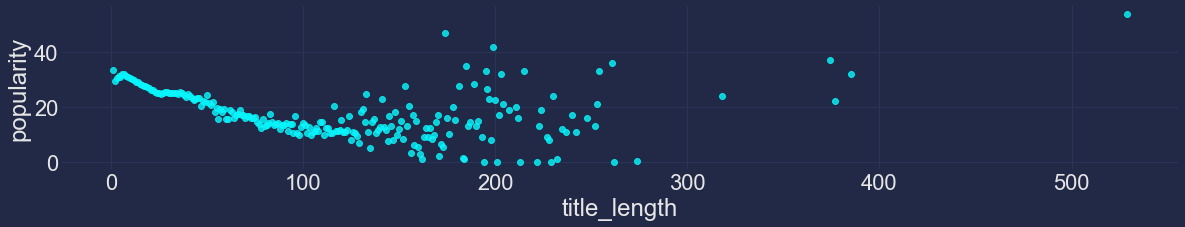

In [101]:
sns.set(rc={'figure.figsize':(20, 3),'legend.fontsize':50}, font_scale = 2)
plt.style.use('cyberpunk')
cyb.make_lines_glow()
sns.regplot(x=length_per_popularity.title_length, y=length_per_popularity.popularity,fit_reg=False)

It looks like the higher the title length, the lower the popularity.

**Short track titles are more successful in general!**

#### Track characteristics per decade

In [37]:
data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,lead_artist,release_decade,title_length
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922,0.645,0.4450,...,0.4510,0.674,0.7440,0.151,0.127,104.851,3,Uli,1920-1929,5.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922,0.695,0.2630,...,0.9570,0.797,0.0000,0.148,0.655,102.009,1,Fernando Pessoa,1920-1929,35.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.434,0.1770,...,0.0512,0.994,0.0218,0.212,0.457,130.418,5,Ignacio Corsini,1920-1929,34.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.321,0.0946,...,0.0504,0.995,0.9180,0.104,0.397,169.980,3,Ignacio Corsini,1920-1929,29.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0.0390,0.989,0.1300,0.311,0.196,103.220,4,Dick Haymes,1920-1929,19.0


In [38]:
data.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'lead_artist',
       'release_decade', 'title_length'],
      dtype='object')

In [39]:
char_per_decade = data[['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence','release_decade']]

In [40]:
char_per_decade.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,release_decade
0,0.645,0.4450,0.4510,0.674,0.7440,0.151,0.127,1920-1929
1,0.695,0.2630,0.9570,0.797,0.0000,0.148,0.655,1920-1929
2,0.434,0.1770,0.0512,0.994,0.0218,0.212,0.457,1920-1929
3,0.321,0.0946,0.0504,0.995,0.9180,0.104,0.397,1920-1929
4,0.402,0.1580,0.0390,0.989,0.1300,0.311,0.196,1920-1929


In [41]:
char_per_decade = char_per_decade.groupby('release_decade').mean()

In [42]:
char_per_decade.reset_index(inplace=True)

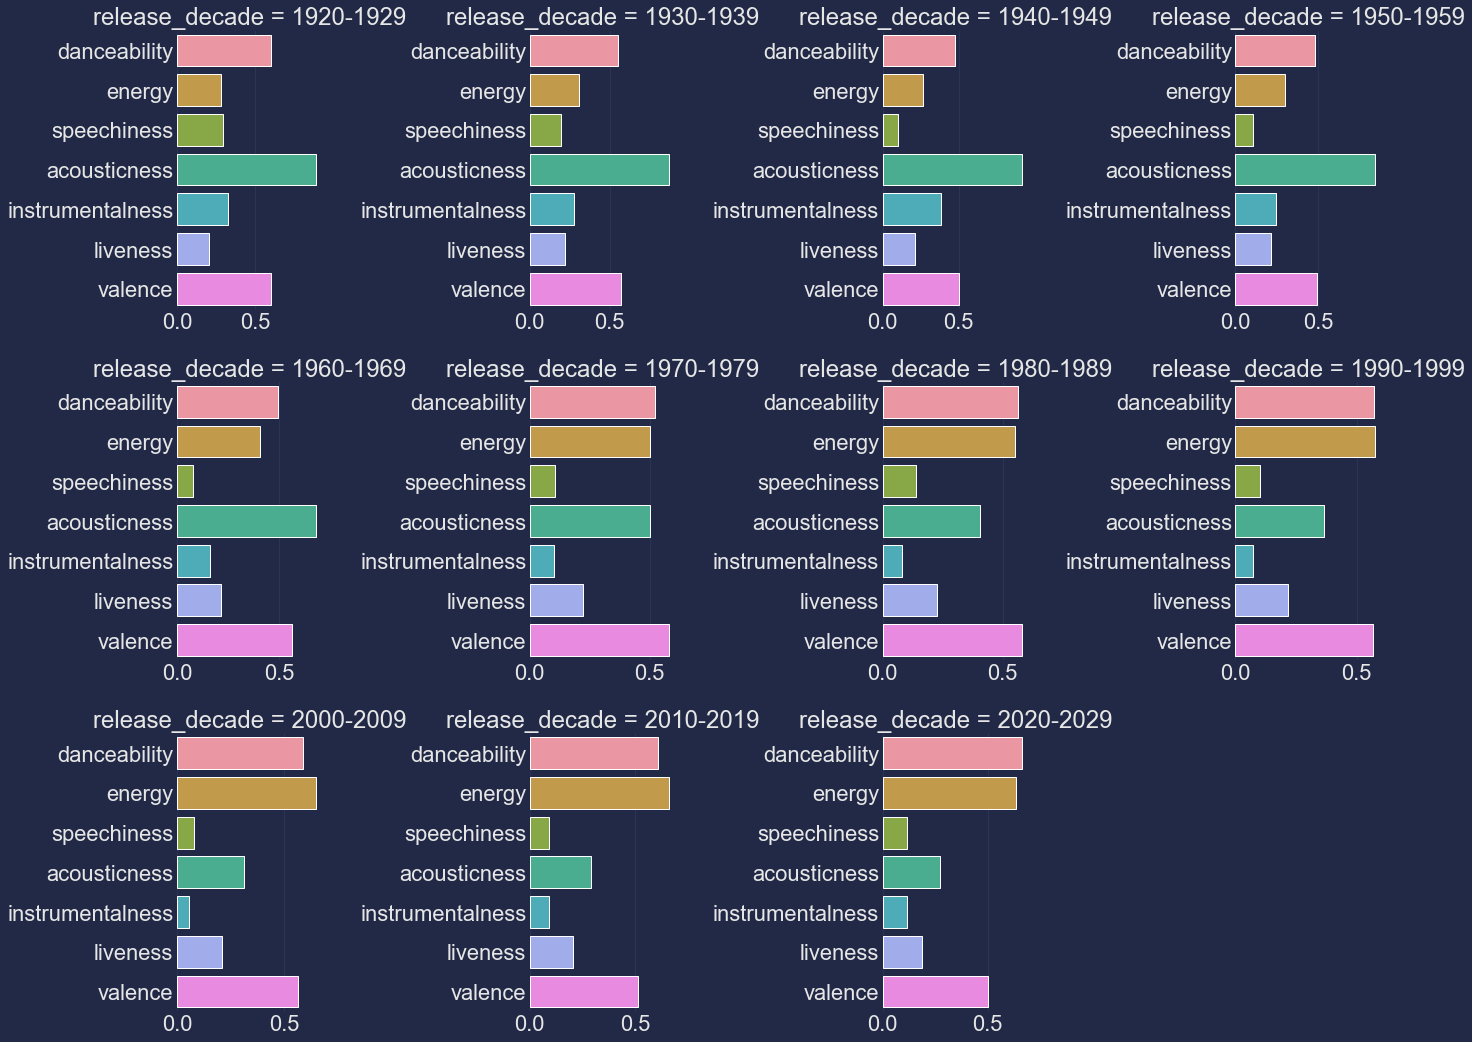

In [43]:
sns.catplot(col='release_decade', data=char_per_decade, kind='bar', col_wrap=4,
              sharey=False,sharex=False,orient='h')

Let's have another view where each chart is sorted by the best characteristic.

In [44]:
def chart_sorter_decade(x):
    for i in ['1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999',
              '2000-2009','2010-2019','2020-2029']:
        if x == i:
            return pd.DataFrame(char_per_decade.set_index('release_decade').transpose()[i].sort_values(ascending=False)).transpose()

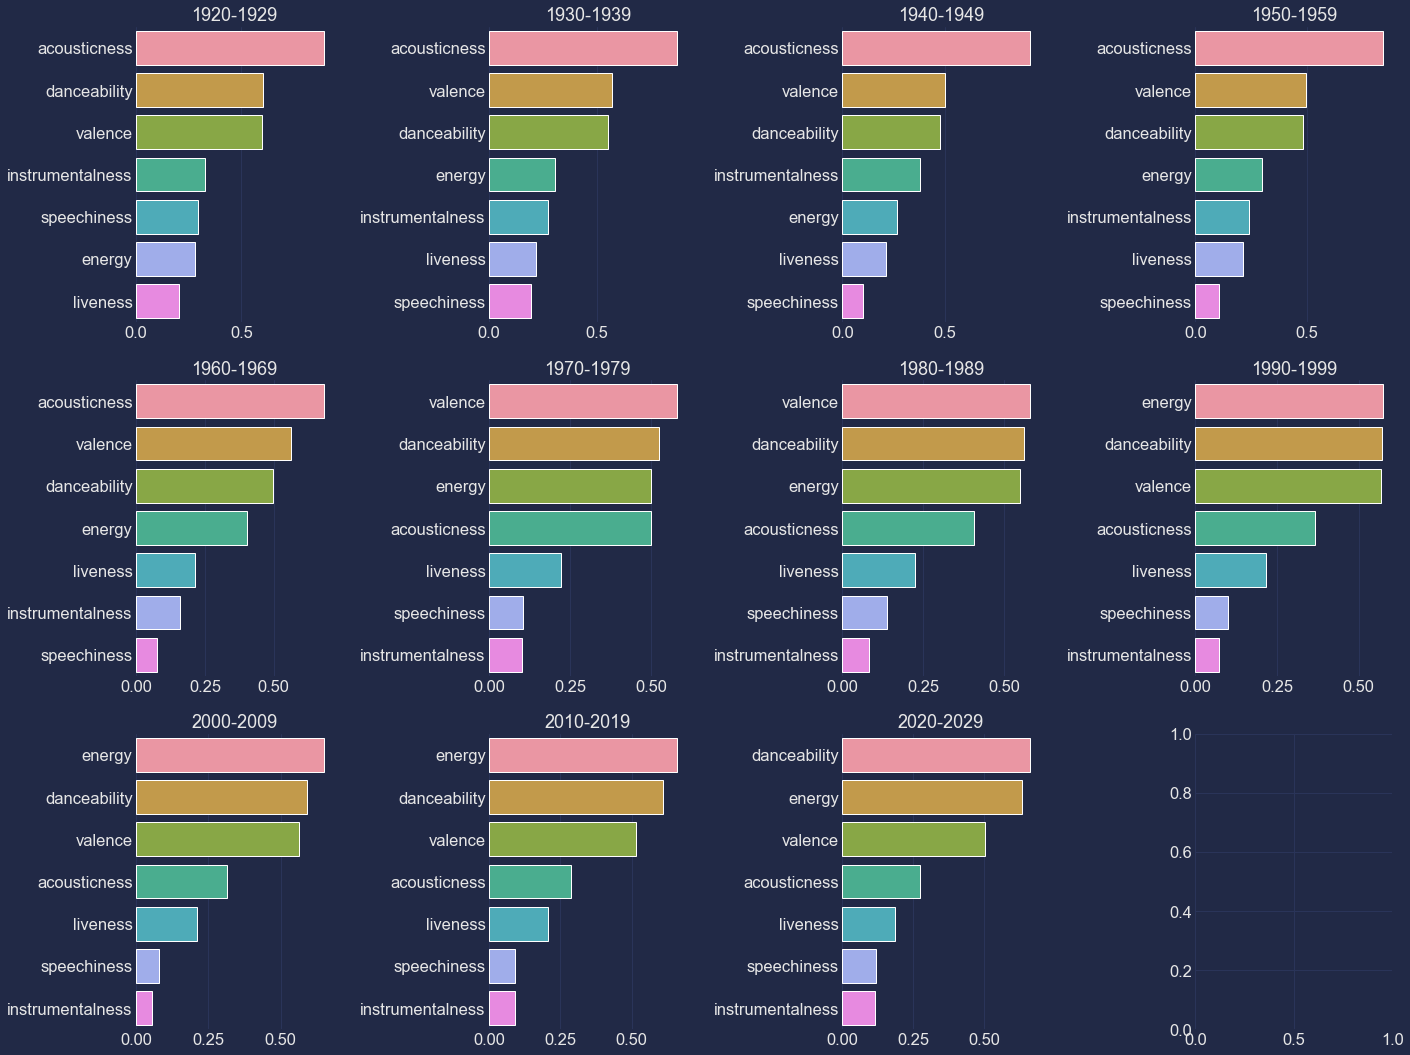

In [45]:
sns.set(rc={'figure.figsize':(20, 15),'legend.fontsize':50}, font_scale = 1.5)
plt.style.use('cyberpunk')
cyb.make_lines_glow()

fig, axs = plt.subplots(3, 4)
m = 0
n = 0

for i in ['1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999',
              '2000-2009','2010-2019','2020-2029']:
    sns.catplot(orient='h',kind='bar',data=chart_sorter_decade(i),ax=axs[m,n])
    axs[m,n].set_title(i)
    n = n+1
    if n == 4:
        n = 0
        m = m+1

for i in (1,3,4,5,6,7,8,9,10,11,12,13):
    plt.close(i)

fig.tight_layout()
plt.show()

#### Most popular characteristics per decade

I will select only most popular songs and redo the same analysis to check what people are looking for today in every decades.

I will select songs with a popularity greater than the third quartile (75%) of the given decade.

In [46]:
data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,lead_artist,release_decade,title_length
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922,0.645,0.4450,...,0.4510,0.674,0.7440,0.151,0.127,104.851,3,Uli,1920-1929,5.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922,0.695,0.2630,...,0.9570,0.797,0.0000,0.148,0.655,102.009,1,Fernando Pessoa,1920-1929,35.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.434,0.1770,...,0.0512,0.994,0.0218,0.212,0.457,130.418,5,Ignacio Corsini,1920-1929,34.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.321,0.0946,...,0.0504,0.995,0.9180,0.104,0.397,169.980,3,Ignacio Corsini,1920-1929,29.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0.0390,0.989,0.1300,0.311,0.196,103.220,4,Dick Haymes,1920-1929,19.0


In [47]:
#Third quartile
data[data['release_decade']=='1970-1979']['popularity'].describe()[6]

32.0

In [48]:
def chart_sorter_decade_third_quartile(x):
    for i in ['1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999',
              '2000-2009','2010-2019','2020-2029']:
        if x == i:
            char_per_decade = data[['popularity','danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence','release_decade']]
            char_per_decade = char_per_decade[char_per_decade['popularity']>=char_per_decade[char_per_decade['release_decade']==x]['popularity'].describe()[6]]
            char_per_decade = char_per_decade.groupby('release_decade').mean()
            char_per_decade.reset_index(inplace=True)
            char_per_decade.drop('popularity',axis=1,inplace=True)
            
            return pd.DataFrame(char_per_decade.set_index('release_decade').transpose()[i].sort_values(ascending=False)).transpose()

In [49]:
chart_sorter_decade_third_quartile('1970-1979')

,valence,energy,danceability,acousticness,liveness,instrumentalness,speechiness
1970-1979,0.584798,0.53552,0.533542,0.403849,0.210609,0.096685,0.081969


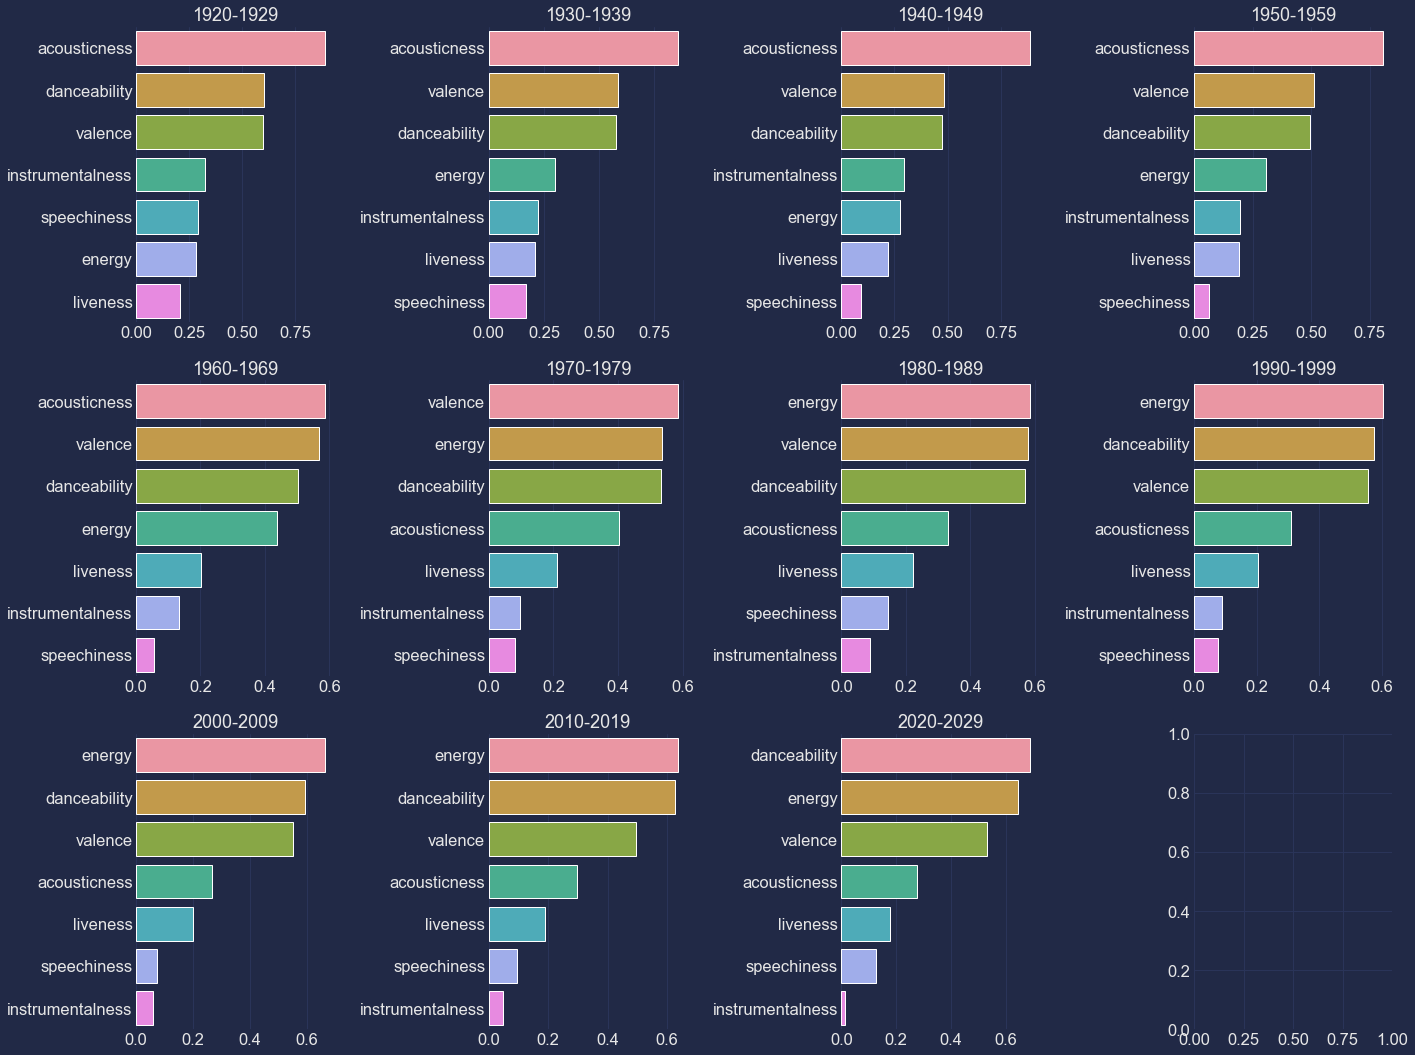

In [50]:
sns.set(rc={'figure.figsize':(20, 15),'legend.fontsize':50}, font_scale = 1.5)
plt.style.use('cyberpunk')
cyb.make_lines_glow()

fig, axs = plt.subplots(3, 4)
m = 0
n = 0

for i in ['1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999',
              '2000-2009','2010-2019','2020-2029']:
    sns.catplot(orient='h',kind='bar',data=chart_sorter_decade_third_quartile(i),ax=axs[m,n])
    axs[m,n].set_title(i)
    n = n+1
    if n == 4:
        n = 0
        m = m+1

for i in (1,3,4,5,6,7,8,9,10,11,12,13):
    plt.close(i)

fig.tight_layout()
plt.show()

I'll create a set of charts which will summarize the whole comparison between released song characteristics per decade and song characteristics of most popular songs.

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


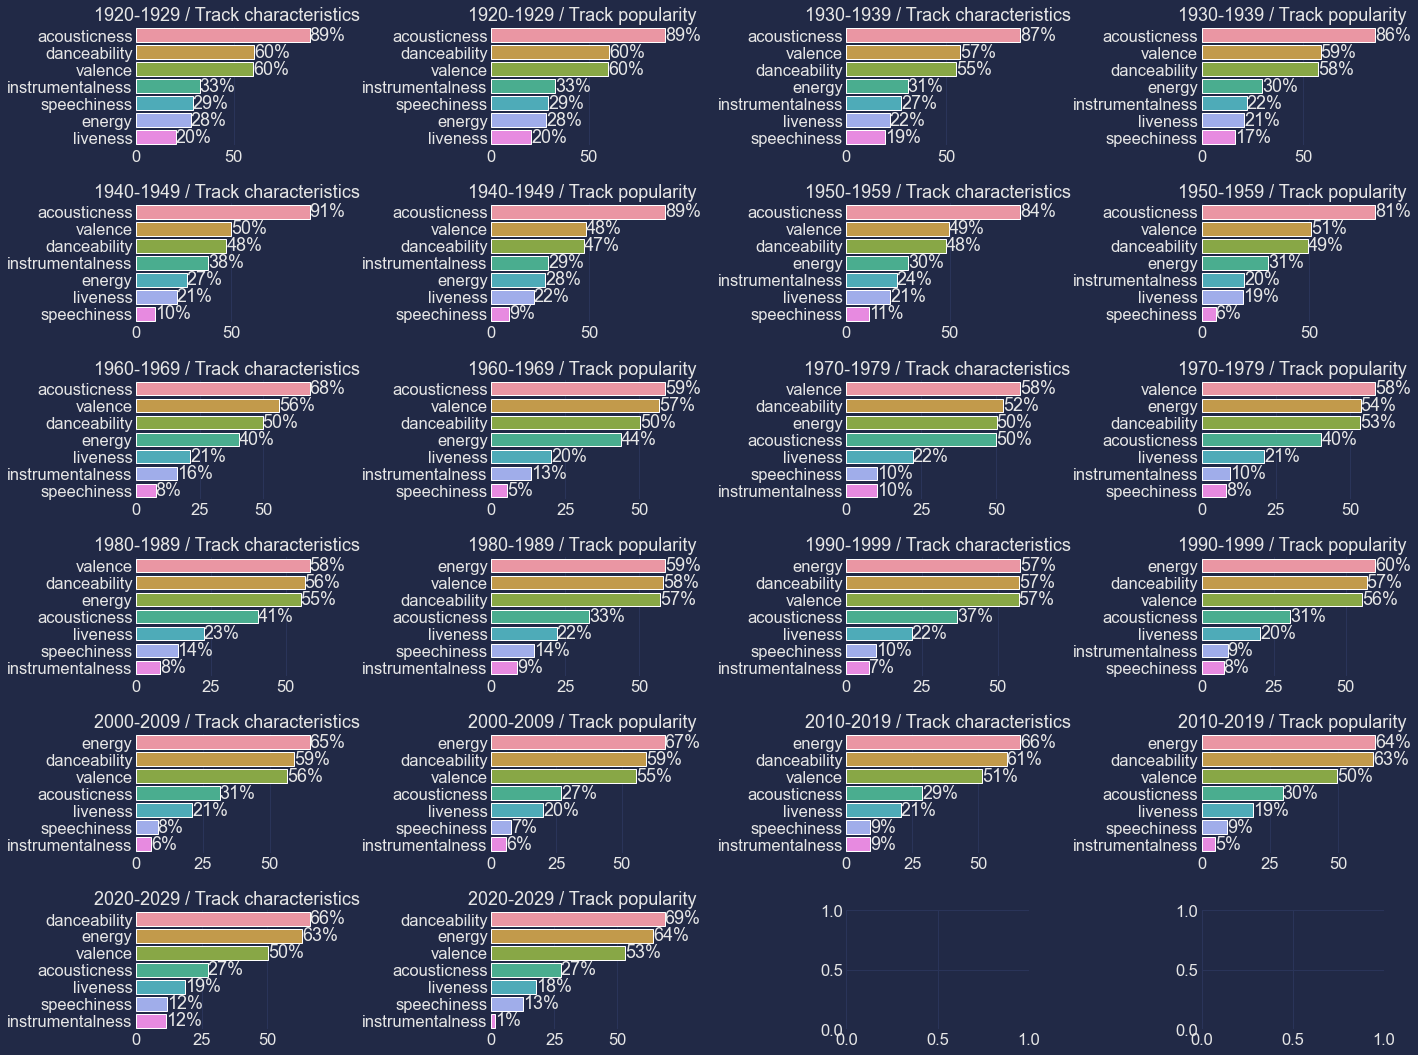

In [51]:
sns.set(rc={'figure.figsize':(20, 15),'legend.fontsize':50}, font_scale = 1.5)
plt.style.use('cyberpunk')
cyb.make_lines_glow()

fig, axs = plt.subplots(6, 4)
m = 0
n = 0

for i in ['1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999',
              '2000-2009','2010-2019','2020-2029']:
    char_per_decade = data[['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence','release_decade']]
    char_per_decade = char_per_decade.groupby('release_decade').mean()
    char_per_decade.reset_index(inplace=True)
    
    sns.catplot(orient='h',kind='bar',data=chart_sorter_decade(i)*100,ax=axs[m,n])
    for c in axs[m,n].containers:
        axs[m,n].bar_label(c, label_type='edge',fmt='%.0f%%')
    
    sns.catplot(orient='h',kind='bar',data=chart_sorter_decade_third_quartile(i)*100,ax=axs[m,n+1])
    for c in axs[m,n+1].containers:
        axs[m,n+1].bar_label(c, label_type='edge',fmt='%.0f%%')
    
    axs[m,n].set_title(i+' '+'/'+' '+'Track characteristics')
    axs[m,n+1].set_title(i+' '+'/'+' '+'Track popularity')
    n = n+2
    if n == 4:
        n = 0
        m = m+1

for i in (1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24):
    plt.close(i)

fig.tight_layout()
plt.show()

This shows that in most decades, people listen to what was mostly made by artists. I did not notice any remarkable difference between track characteristics of a given century and what is most popular.

#### Title analysis

In [52]:
data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,lead_artist,release_decade,title_length
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922,0.645,0.4450,...,0.4510,0.674,0.7440,0.151,0.127,104.851,3,Uli,1920-1929,5.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922,0.695,0.2630,...,0.9570,0.797,0.0000,0.148,0.655,102.009,1,Fernando Pessoa,1920-1929,35.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.434,0.1770,...,0.0512,0.994,0.0218,0.212,0.457,130.418,5,Ignacio Corsini,1920-1929,34.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.321,0.0946,...,0.0504,0.995,0.9180,0.104,0.397,169.980,3,Ignacio Corsini,1920-1929,29.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0.0390,0.989,0.1300,0.311,0.196,103.220,4,Dick Haymes,1920-1929,19.0


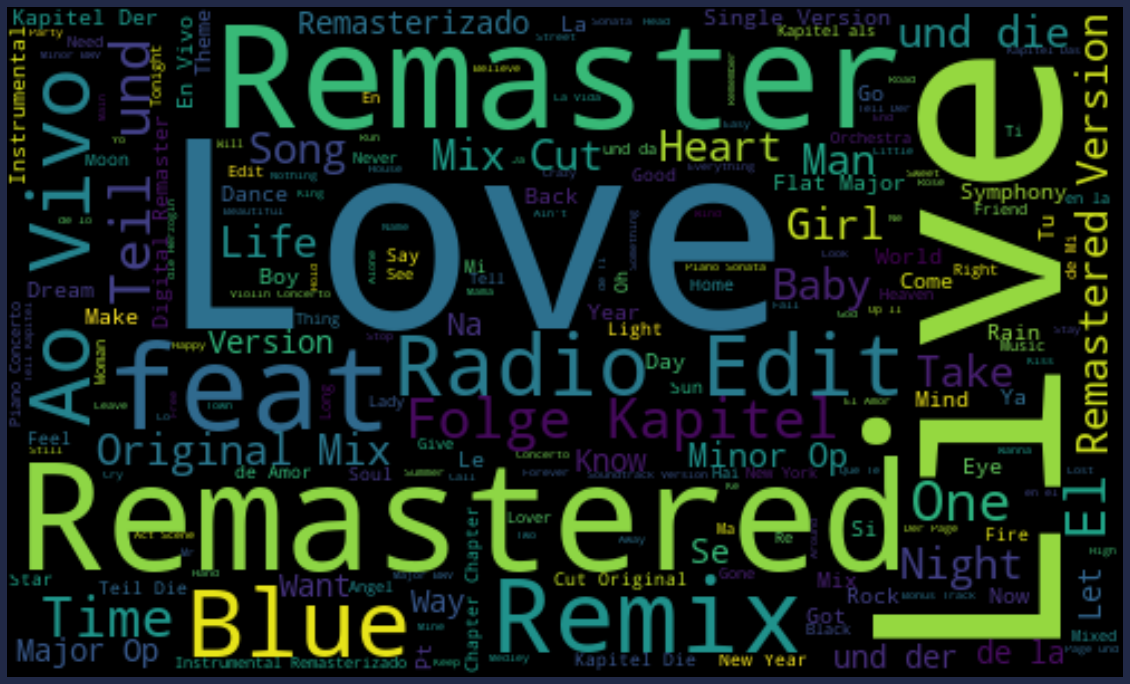

In [53]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

full_text = ' '.join([txt for txt in data['name'].dropna()])

wordcloud = WordCloud(width=500, height=300, max_font_size=119).generate(full_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Now I will redo the wordcloud but only focusing on most popular songs and remove stopwords.

In [54]:
most_popular_songs = \
data[((data['release_decade']=='1920-1929')&(data['popularity']>=data[data['release_decade']=='1920-1929']['popularity'].describe()[6]))|\
    ((data['release_decade']=='1930-1939')&(data['popularity']>=data[data['release_decade']=='1930-1939']['popularity'].describe()[6]))|\
    ((data['release_decade']=='1940-1949')&(data['popularity']>=data[data['release_decade']=='1940-1949']['popularity'].describe()[6]))|\
    ((data['release_decade']=='1950-1959')&(data['popularity']>=data[data['release_decade']=='1950-1959']['popularity'].describe()[6]))|\
    ((data['release_decade']=='1960-1969')&(data['popularity']>=data[data['release_decade']=='1960-1969']['popularity'].describe()[6]))|\
    ((data['release_decade']=='1970-1979')&(data['popularity']>=data[data['release_decade']=='1970-1979']['popularity'].describe()[6]))|\
    ((data['release_decade']=='1980-1989')&(data['popularity']>=data[data['release_decade']=='1980-1989']['popularity'].describe()[6]))|\
    ((data['release_decade']=='1990-1999')&(data['popularity']>=data[data['release_decade']=='1990-1999']['popularity'].describe()[6]))|\
    ((data['release_decade']=='2000-2009')&(data['popularity']>=data[data['release_decade']=='2000-2009']['popularity'].describe()[6]))|\
    ((data['release_decade']=='2010-2019')&(data['popularity']>=data[data['release_decade']=='2010-2019']['popularity'].describe()[6]))|\
    ((data['release_decade']=='2020-2029')&(data['popularity']>=data[data['release_decade']=='2020-2029']['popularity'].describe()[6]))]

In [55]:
#Full text
#full_text = ' '.join([txt for txt in most_popular_songs['name'].dropna()])
#full_text = ' '.join([txt for txt in full_text.split() if txt.lower() not in (stopwords.words('english') + stopwords.words('french') + stopwords.words('spanish') + stopwords.words('german'))])


In [56]:
#text_file = open("full_text.txt", "w")
#n = text_file.write(full_text)
#text_file.close()

In [57]:
f = open("full_text.txt", "r")
full_text=f.read()

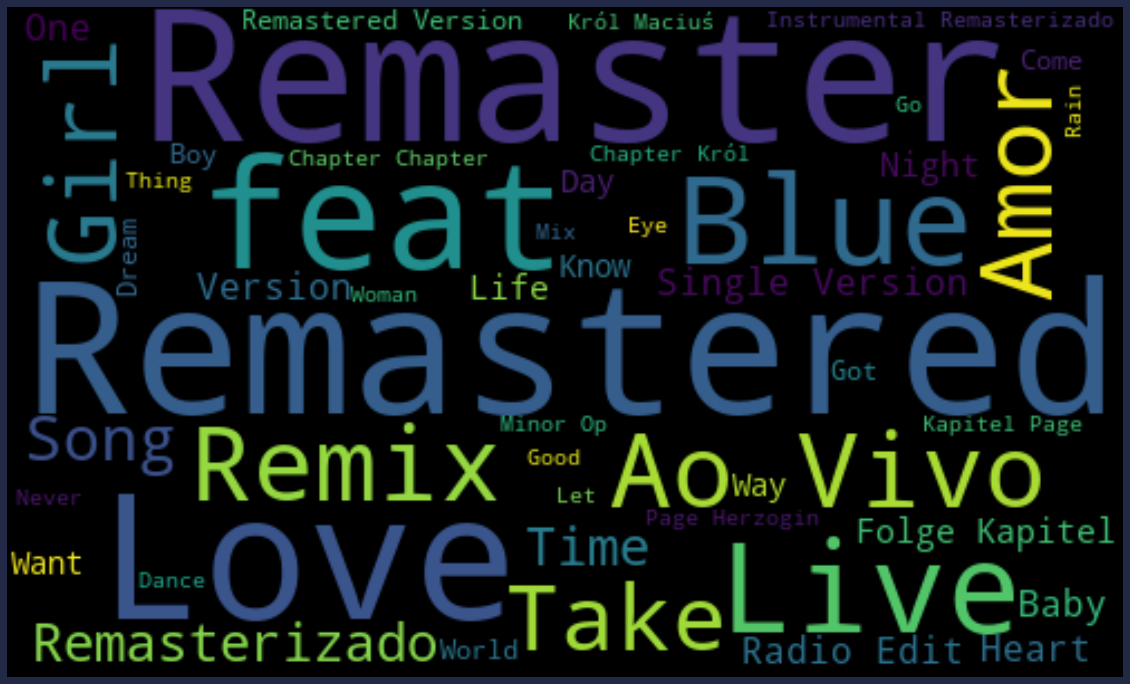

In [61]:
wordcloud = WordCloud(width=500, height=300, max_font_size=119,max_words=50).generate(full_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [63]:
from collections import Counter

#c = Counter(' '.join(data['name'].dropna().sample(frac=0.001)).split())

#print("There are {} unique words.".format(len(c)))

#word_count = pd.DataFrame(columns=['word','count'])
#for k, v in c.items():
    #word_count=word_count.append({'word':k,'count':v},ignore_index=True).sort_values(by='count',ascending=False)

In [65]:
c = Counter(full_text.lower().split())

In [114]:
pd.DataFrame(c.most_common(30),columns=['Word','Count'])

,Word,Count
0,-,31268
1,love,4706
2,remastered,4142
3,remaster,3927
4,(feat.,3622
5,version,3084
6,&,2557
7,live,2431
8,teil,2129
9,kapitel,1741


Now I will check the popularity of Remastered / Remix / Feat / Radio Edit / Version songs. I want to see if creating one of these makes a song more popular...

In [68]:
data2 = most_popular_songs.dropna()

In [69]:
print('Remastered songs have an average popularity of:',\
      data2[data2['name'].str.contains('remastered|remaster|remasterizado',case=False)]['popularity'].mean())

Remastered songs have an average popularity of: 35.47365853658537


In [70]:
print('Remixed songs have an average popularity of:',\
      data2[data2['name'].str.contains('remix',case=False)]['popularity'].mean())

Remixed songs have an average popularity of: 56.98367346938775


In [71]:
print('Edited songs have an average popularity of:',\
      data2[data2['name'].str.contains('edit',case=False)]['popularity'].mean())

Edited songs have an average popularity of: 49.22826086956522


In [72]:
print('Songs with a new version have an average popularity of:',\
      data2[data2['name'].str.contains('version',case=False)]['popularity'].mean())

Songs with a new version have an average popularity of: 41.80964835803545


In [73]:
print('Songs with a featuring have an average popularity of:',\
      data2[data2['name'].str.contains('feat',case=False)]['popularity'].mean())

Songs with a featuring have an average popularity of: 60.04824561403509


In [74]:
a = data2[data2['name'].str.contains('remastered|remaster|remasterizado|remix|edit|version|feat',case=False)]
all_others = data2.drop(a.index,axis=0)
print('All other songs have an average popularity of:',\
      all_others['popularity'].mean())

All other songs have an average popularity of: 43.23583773746608


**Featurings and remixes have higher popularity than "normal" songs.**

#### Explicit songs analysis

In [75]:
data

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,lead_artist,release_decade,title_length
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922,0.645,0.4450,...,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,Uli,1920-1929,5.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922,0.695,0.2630,...,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,Fernando Pessoa,1920-1929,35.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.434,0.1770,...,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,Ignacio Corsini,1920-1929,34.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.321,0.0946,...,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,Ignacio Corsini,1920-1929,29.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,Dick Haymes,1920-1929,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020,0.560,0.5180,...,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,阿YueYue,2020-2029,3.0
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020,0.765,0.6630,...,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,ROLE MODEL,2020-2029,5.0
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020,0.535,0.3140,...,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,FINNEAS,2020-2029,25.0
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021,0.696,0.6150,...,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,Gentle Bones,2020-2029,15.0


In [76]:
explicit_data = data[['name','explicit','popularity']]

In [77]:
explicit_data.head()

,name,explicit,popularity
0,Carve,0,6
1,Capítulo 2.16 - Banquero Anarquista,0,0
2,Vivo para Quererte - Remasterizado,0,0
3,El Prisionero - Remasterizado,0,0
4,Lady of the Evening,0,0


In [78]:
explicit_data.explicit.value_counts(normalize=True)

0    0.955914
1    0.044086
Name: explicit, dtype: float64

**Most songs in the dataset are non-explicit (96%).**

Let's see if explicit songs are more popular.

In [79]:
explicit_data.groupby('explicit').mean()

,popularity
explicit,
0,26.734647
1,45.684426


**There we see that explicit songs have an higher average popularity.**

Let's redo the analysis but filtering on the most popular songs per decade. We'll check if we see the same trend.

In [80]:
explicit_data_popular = most_popular_songs[['name','explicit','popularity']]

In [81]:
explicit_data_popular.head()

,name,explicit,popularity
0,Carve,0,6
1,Capítulo 2.16 - Banquero Anarquista,0,0
2,Vivo para Quererte - Remasterizado,0,0
3,El Prisionero - Remasterizado,0,0
4,Lady of the Evening,0,0


In [82]:
explicit_data_popular.explicit.value_counts(normalize=True)

0    0.92767
1    0.07233
Name: explicit, dtype: float64

There's a slightly higher share of explicit songs in the most popular songs.

In [83]:
explicit_data_popular.groupby('explicit').mean()

,popularity
explicit,
0,41.983691
1,59.457931


We see the exact same trend in the most popular songs. Then we can assume that **explicit songs have more popularity on average**.

#### Popularity per track duration

In [84]:
data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,lead_artist,release_decade,title_length
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922,0.645,0.4450,...,0.4510,0.674,0.7440,0.151,0.127,104.851,3,Uli,1920-1929,5.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922,0.695,0.2630,...,0.9570,0.797,0.0000,0.148,0.655,102.009,1,Fernando Pessoa,1920-1929,35.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.434,0.1770,...,0.0512,0.994,0.0218,0.212,0.457,130.418,5,Ignacio Corsini,1920-1929,34.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.321,0.0946,...,0.0504,0.995,0.9180,0.104,0.397,169.980,3,Ignacio Corsini,1920-1929,29.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0.0390,0.989,0.1300,0.311,0.196,103.220,4,Dick Haymes,1920-1929,19.0


In [85]:
title_duration = data[['duration_ms','popularity']].groupby('duration_ms').mean()

In [86]:
title_duration.reset_index(inplace=True)

<AxesSubplot:xlabel='duration_ms', ylabel='popularity'>

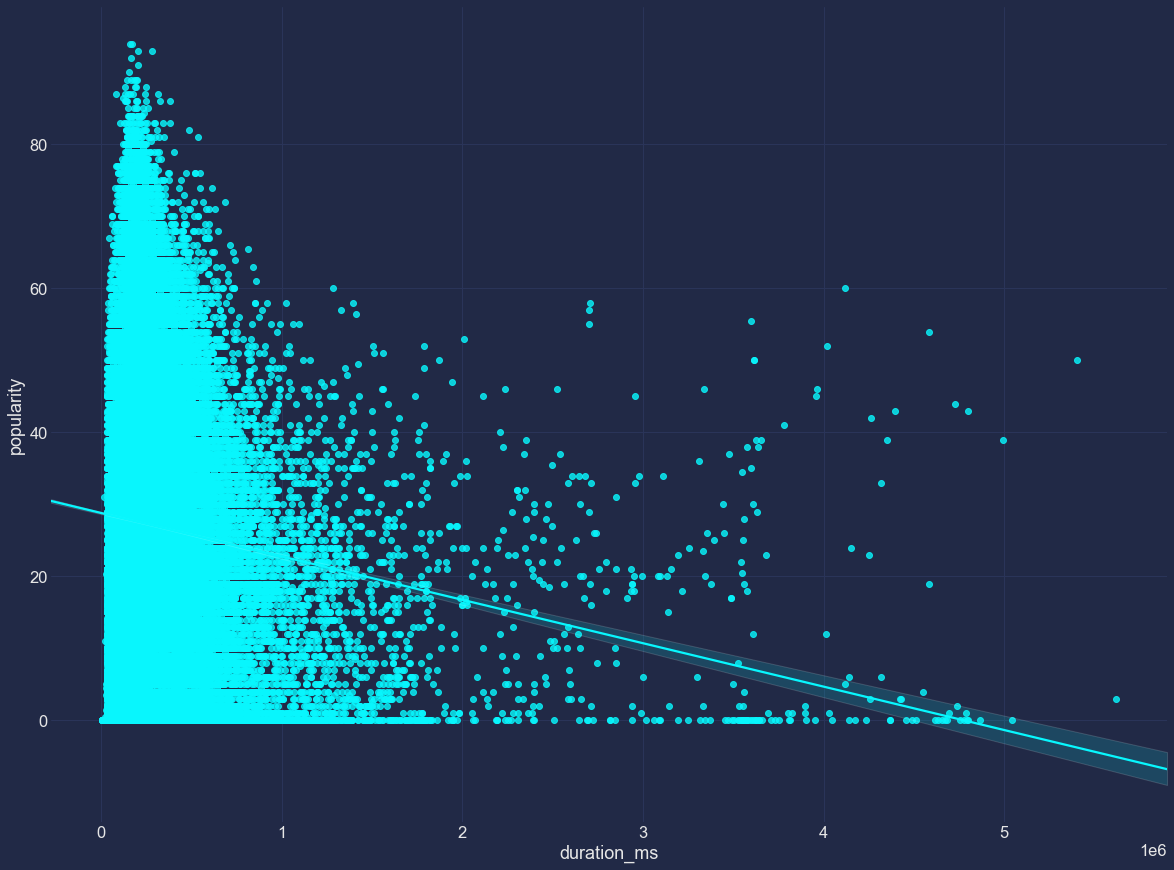

In [87]:
sns.regplot(x=title_duration.duration_ms, y=title_duration.popularity)

#### Tempo per date

In [88]:
data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,lead_artist,release_decade,title_length
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922,0.645,0.4450,...,0.4510,0.674,0.7440,0.151,0.127,104.851,3,Uli,1920-1929,5.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922,0.695,0.2630,...,0.9570,0.797,0.0000,0.148,0.655,102.009,1,Fernando Pessoa,1920-1929,35.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.434,0.1770,...,0.0512,0.994,0.0218,0.212,0.457,130.418,5,Ignacio Corsini,1920-1929,34.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.321,0.0946,...,0.0504,0.995,0.9180,0.104,0.397,169.980,3,Ignacio Corsini,1920-1929,29.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0.0390,0.989,0.1300,0.311,0.196,103.220,4,Dick Haymes,1920-1929,19.0


In [105]:
tempo_data = data[['tempo','release_date','popularity']]

In [106]:
tempo_data = tempo_data.groupby('release_date').mean()

In [107]:
tempo_data.reset_index(inplace=True)

<AxesSubplot:xlabel='release_date', ylabel='tempo'>

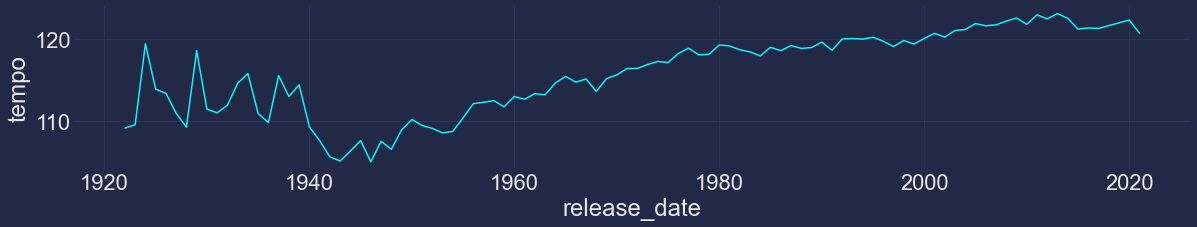

In [112]:
sns.set(rc={'figure.figsize':(20, 3),'legend.fontsize':50}, font_scale = 2)
plt.style.use('cyberpunk')
cyb.make_lines_glow()
sns.lineplot(x=tempo_data.release_date, y=tempo_data.tempo)

**Tempo above 120bpm is what is most released in 2000-2021 on average.**

In [93]:
tempo_data = data[['tempo','release_date','popularity']]

In [94]:
tempo_data['tempo'] = round(tempo_data['tempo']).apply(lambda x: int(x))

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
tempo_data

,tempo,release_date,popularity
0,105,1922,6
1,102,1922,0
2,130,1922,0
3,170,1922,0
4,103,1922,0
...,...,...,...
586667,132,2020,50
586668,150,2020,72
586669,145,2020,70
586670,90,2021,58


In [96]:
tempo_data = tempo_data.groupby('tempo').mean()

In [97]:
tempo_data.reset_index(inplace=True)

<AxesSubplot:xlabel='tempo', ylabel='popularity'>

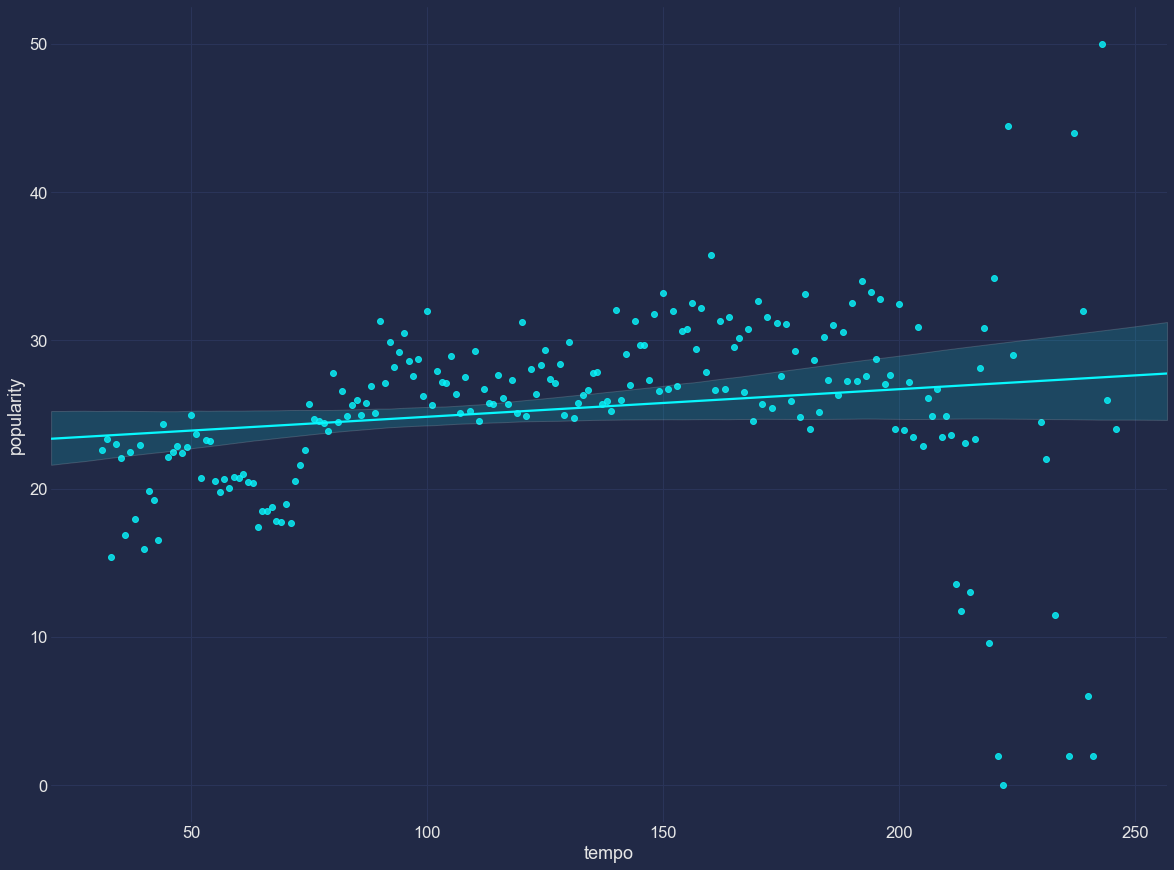

In [98]:
sns.regplot(x=tempo_data[1:].tempo, y=tempo_data[1:].popularity)

On average, there is an upward trend when it comes to tempo. **The higher the tempo, the higher the popularity.**

**Thanks for reading.**

**Check out my GitHub page for other projects: https://github.com/SalimAmarti**